In [1]:
# only adjust settings in this cell
state = 'ID' 
year = 2020
enumeration_limit = 10

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of ID has 2 districts.


In [5]:
from optimization import generate_plans_with_refinement

plans, first_feasible_dev = generate_plans_with_refinement(G, ideal_population, state, year, enumeration_limit)


*****************************************
Trying deviation = 0.5.
*****************************************
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
Total time = 16.53

*****************************************
Trying deviation = 1.0.
*****************************************
Total time = 13.42

*****************************************
Trying deviation = 2.0.
*****************************************
Total time = 8.2

*****************************************
Trying deviation = 4.0.
*****************************************
Total time = 7.59

*****************************************
Trying deviation = 8.0.
*****************************************
Total time = 3.97

*****************************************
Trying deviation = 16.0.
*****************************************
Total time = 2.98

*****************************************
Trying deviation = 32.0.
************************************

In [6]:
no_solution_region = [0, first_feasible_dev] if first_feasible_dev > 0.5 else None
print(f"No feasible solution was found within the region: {no_solution_region}")

No feasible solution was found within the region: None


***************************************
obj_type = cut_edges
***************************************
Pareto front objective values: [[0.0, 29], [2.0, 26], [5.0, 20], [87.0, 19], [117.0, 18], [131.0, 16], [209.0, 15], [237.0, 12], [1556.0, 11]]


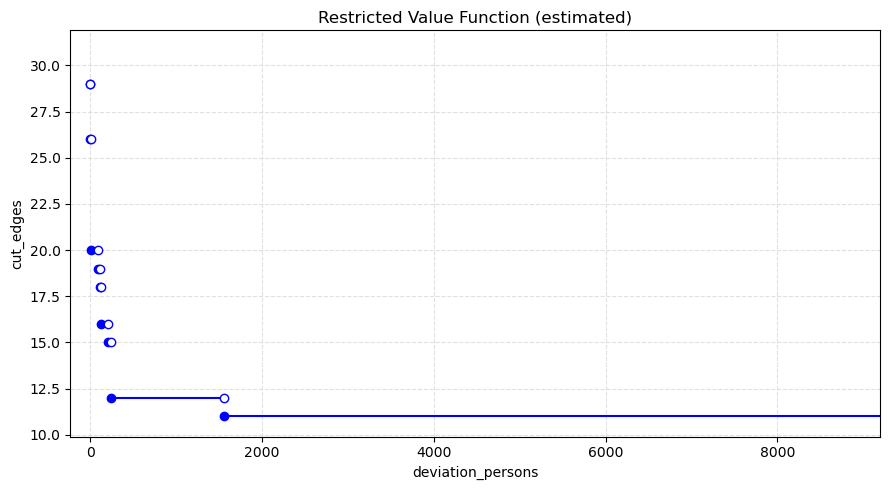

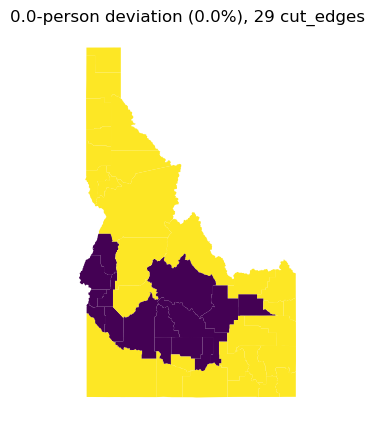

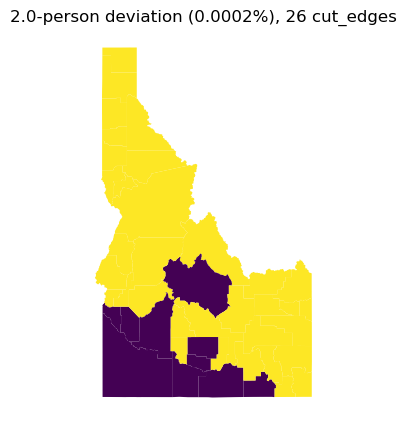

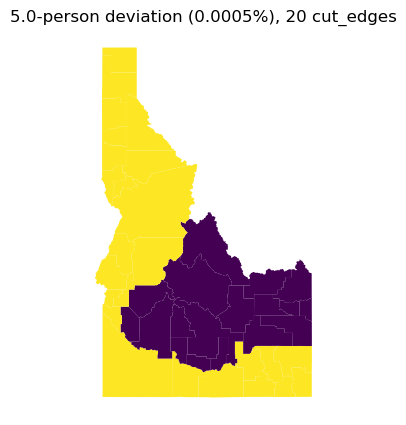

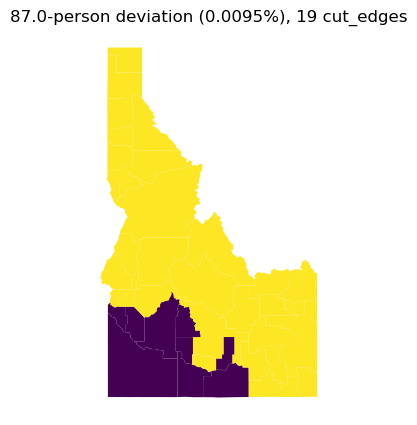

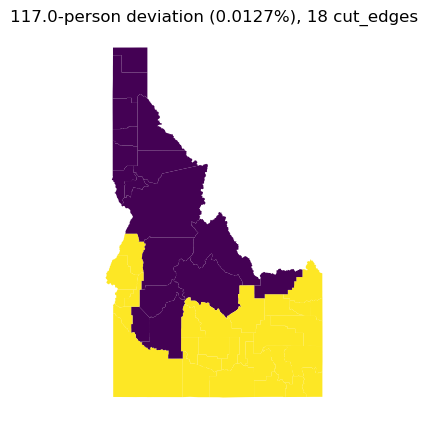

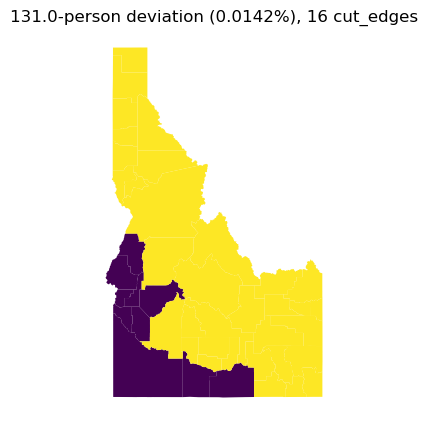

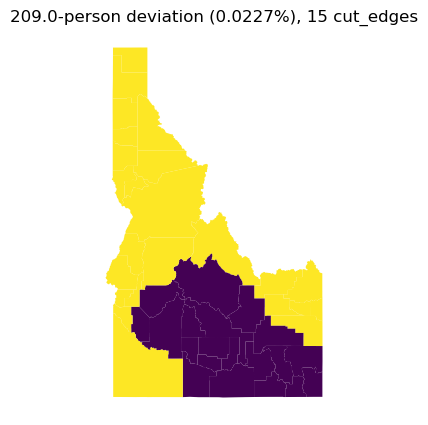

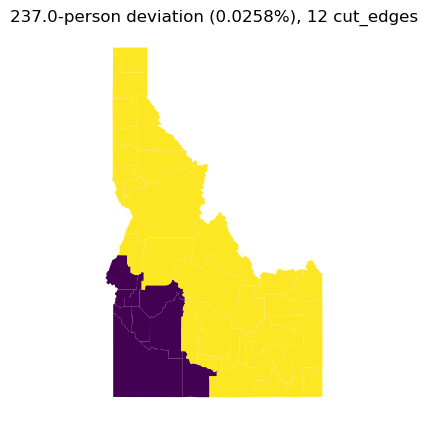

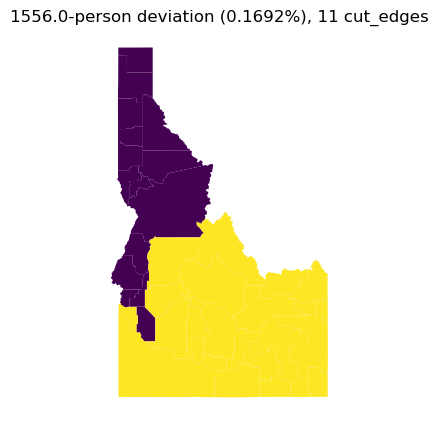

***************************************
obj_type = perimeter
***************************************
Pareto front objective values: [[0.0, 67.92867059645073], [2.0, 63.62857405508695], [4.0, 61.98416790631538], [5.0, 53.20350840912502], [31.0, 52.715364036600725], [87.0, 46.97556876464984], [237.0, 43.24088390394121], [1556.0, 42.55377926884675]]


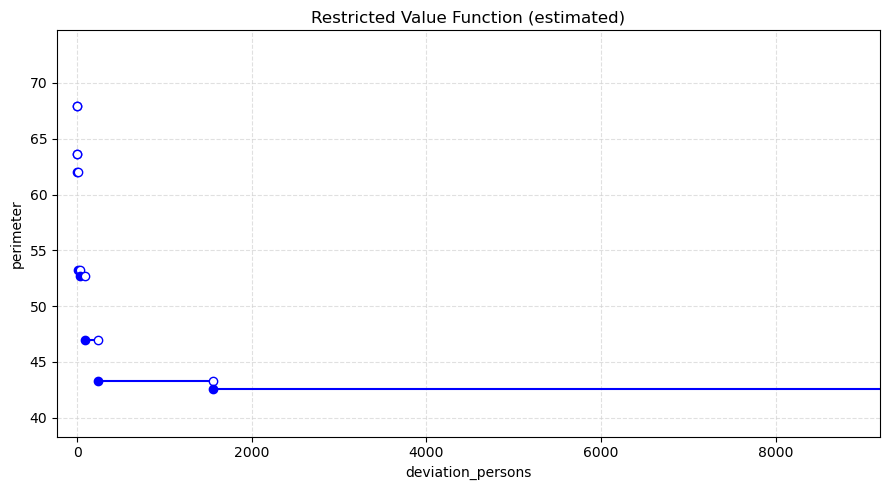

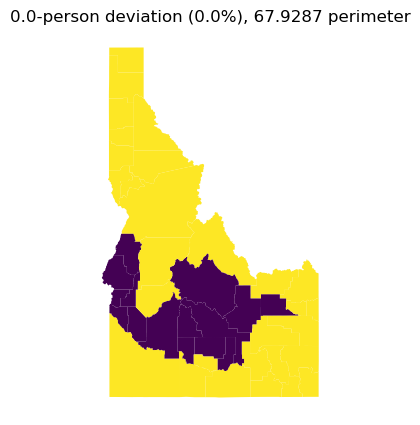

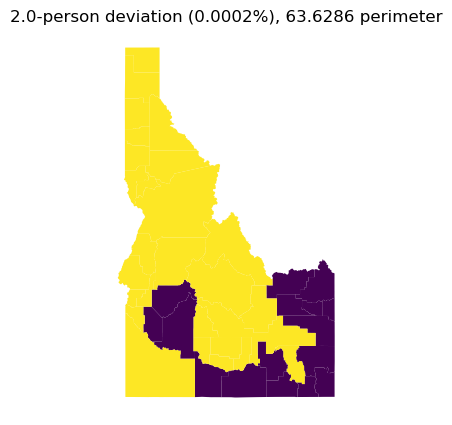

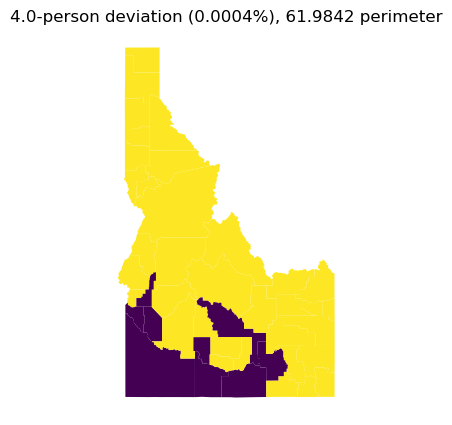

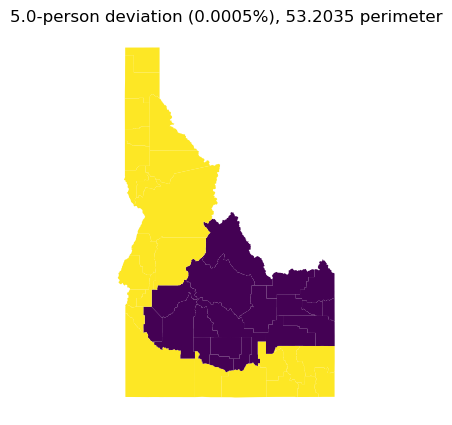

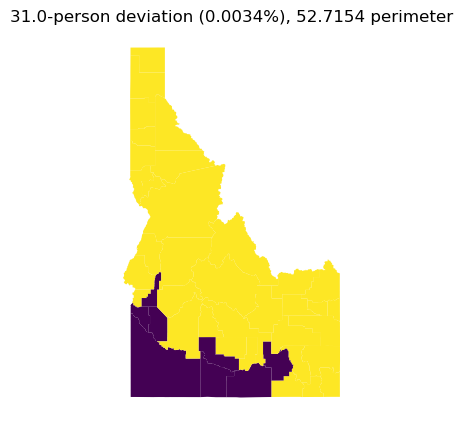

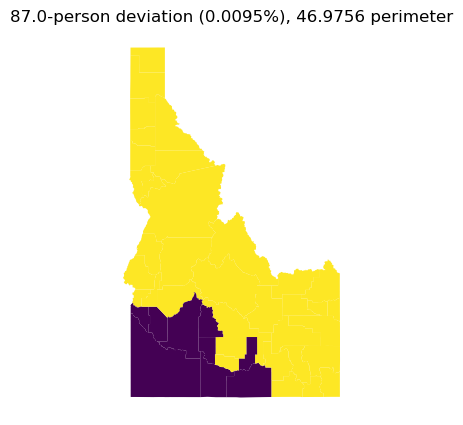

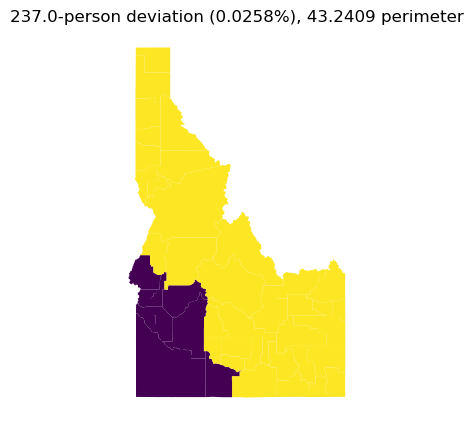

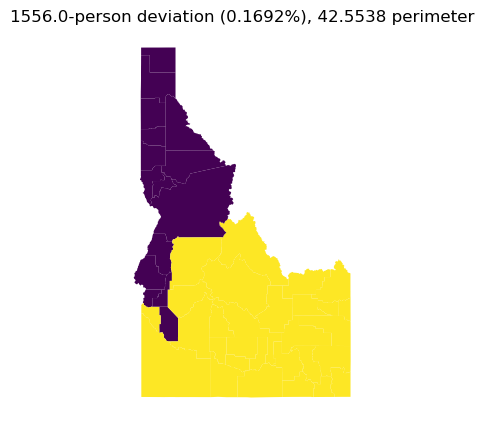

***************************************
obj_type = inverse_Polsby_Popper
***************************************
Pareto front objective values: [[0.0, 8.539806032366492], [2.0, 7.858632866339165], [4.0, 7.61358897717084], [5.0, 5.244888432236371], [87.0, 4.153221799830618], [237.0, 3.53768722152464]]


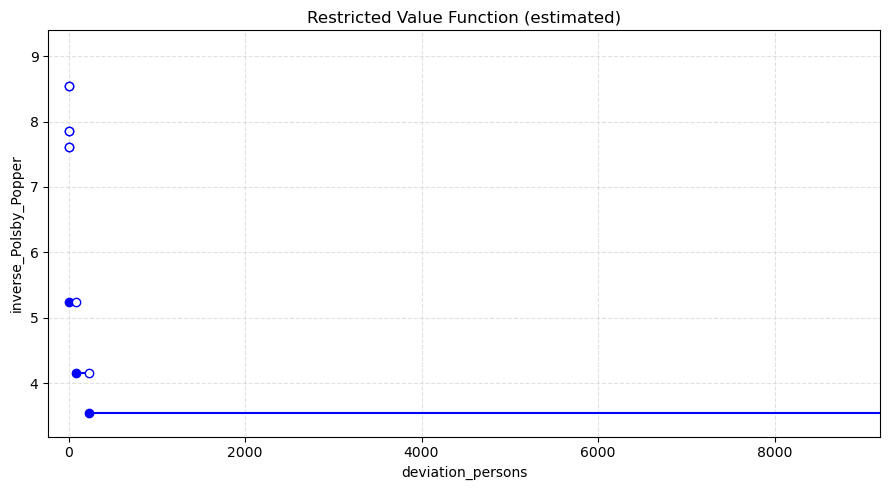

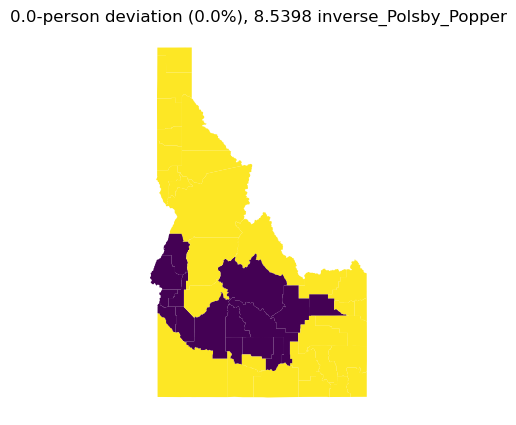

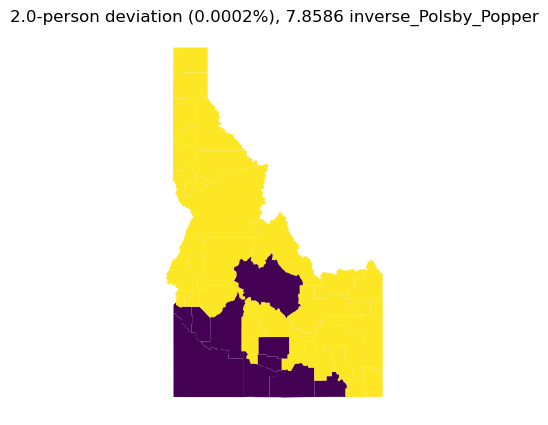

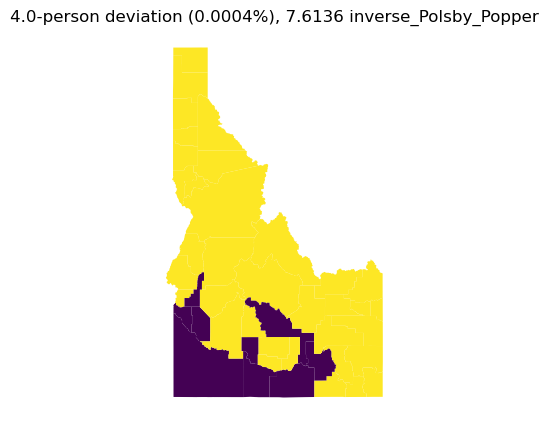

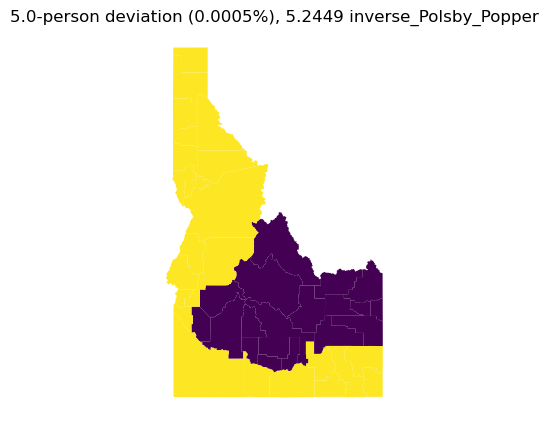

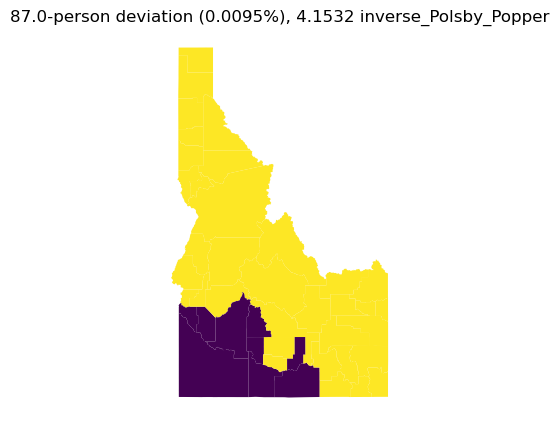

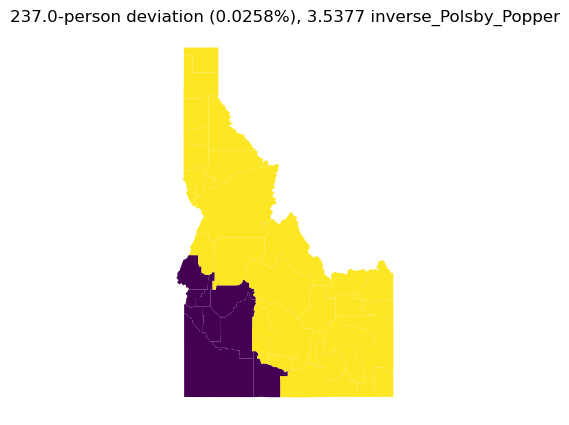

***************************************
obj_type = average_Polsby_Popper
***************************************
Pareto front objective values: [[0.0, 0.12727756662191336], [2.0, 0.13368872817760816], [5.0, 0.21860574398613558], [87.0, 0.25603715522825043], [209.0, 0.2624765456662123], [237.0, 0.29923454997089716], [4796.0, 0.33410210632775506]]


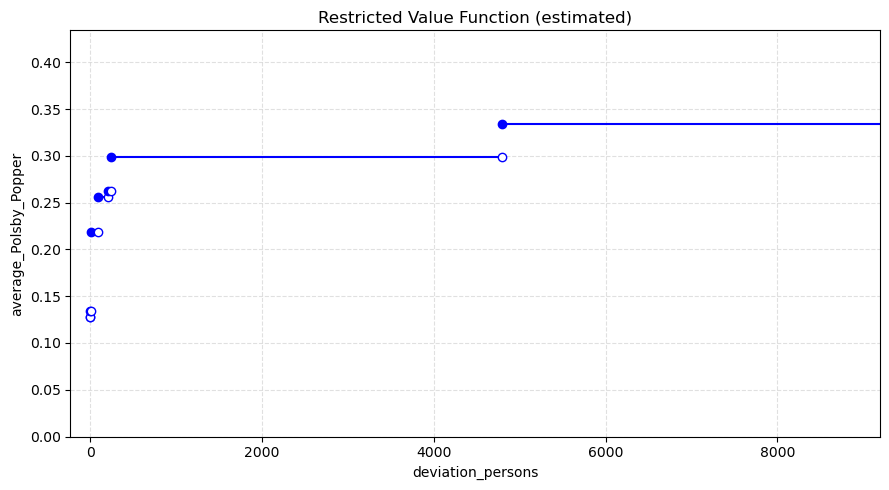

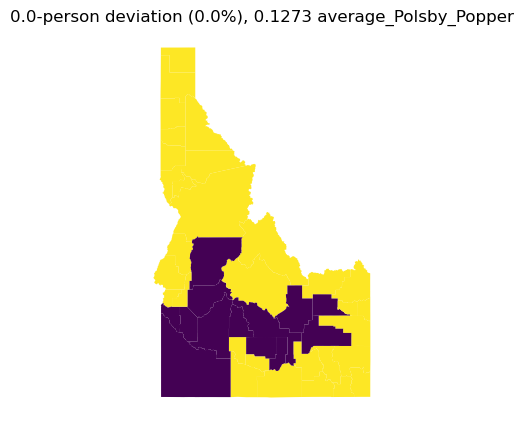

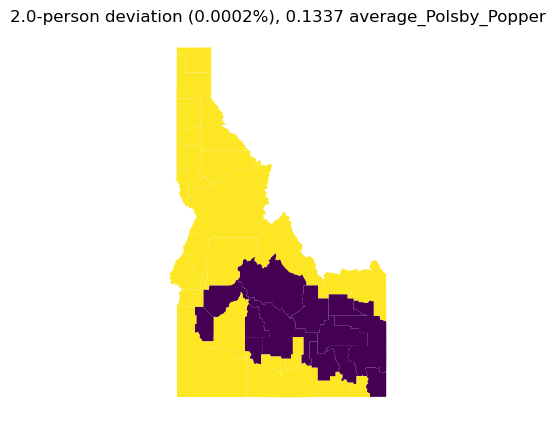

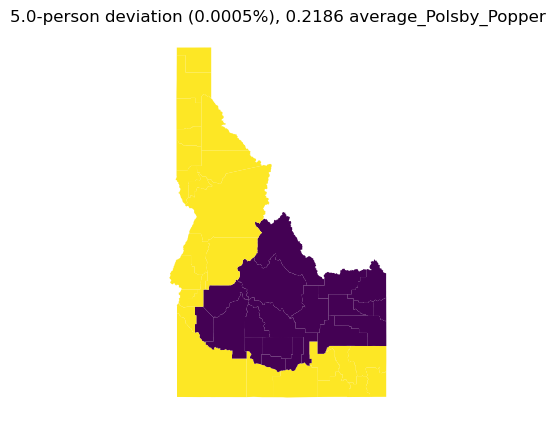

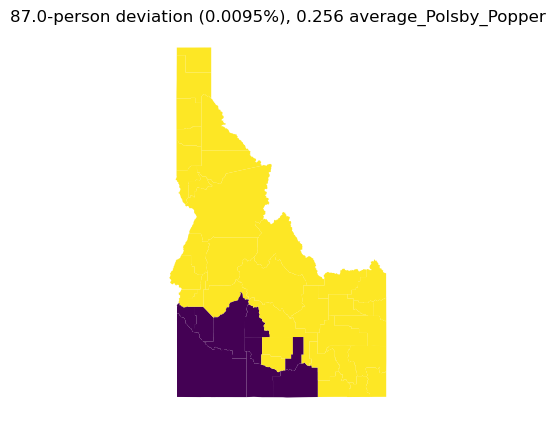

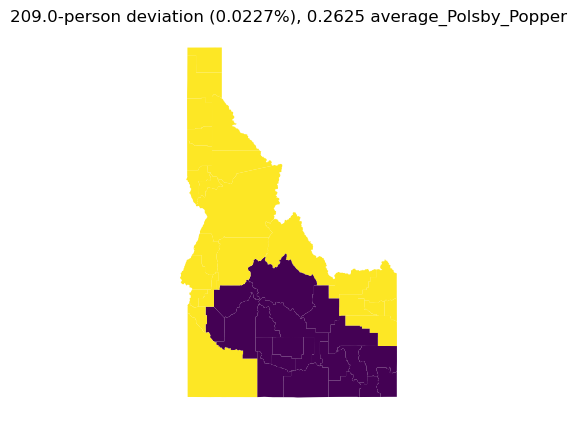

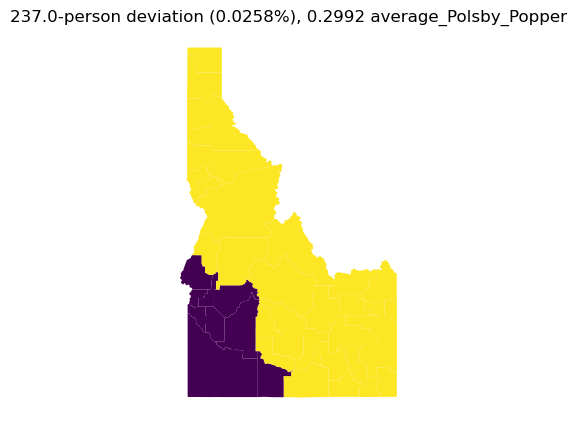

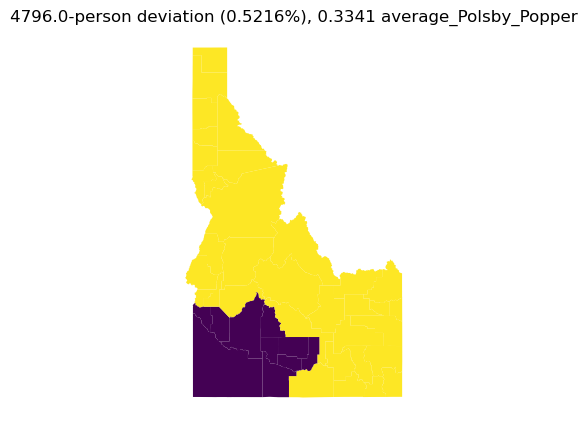

***************************************
obj_type = bottleneck_Polsby_Popper
***************************************
Pareto front objective values: [[0.0, 0.09177383654963098], [2.0, 0.11964563366353058], [4.0, 0.128786025653641], [5.0, 0.14044756324344665], [11.0, 0.1556693094440528], [31.0, 0.16963554026679817], [87.0, 0.1935296811073338], [237.0, 0.22883198997372206]]


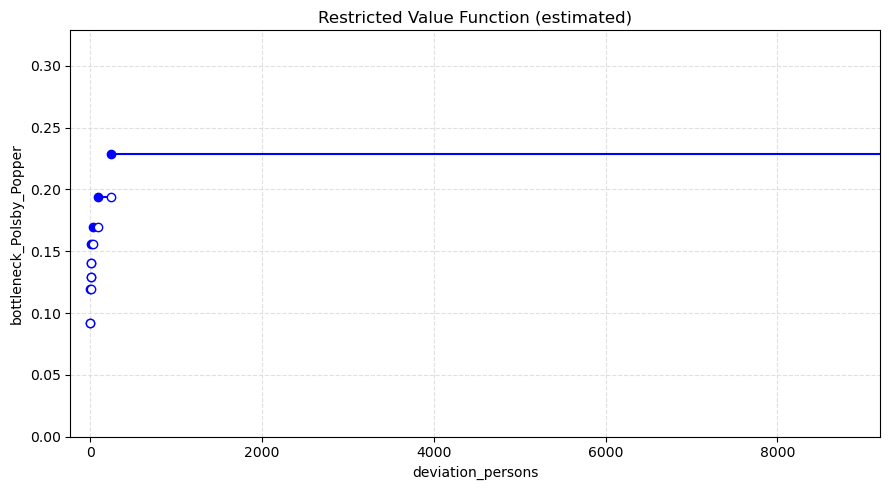

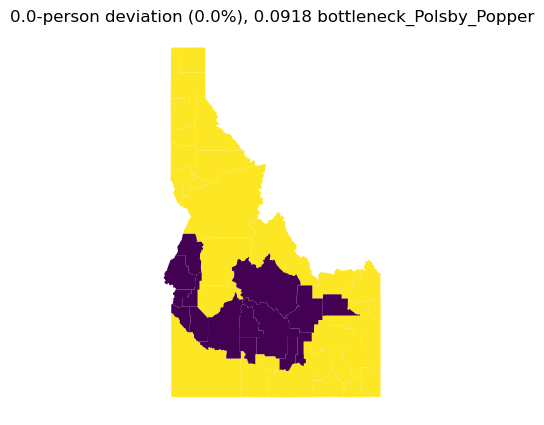

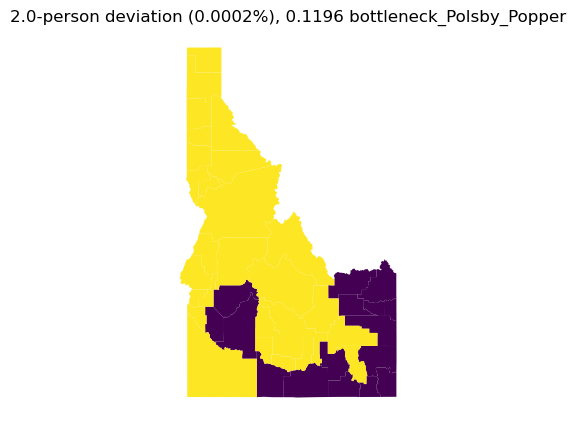

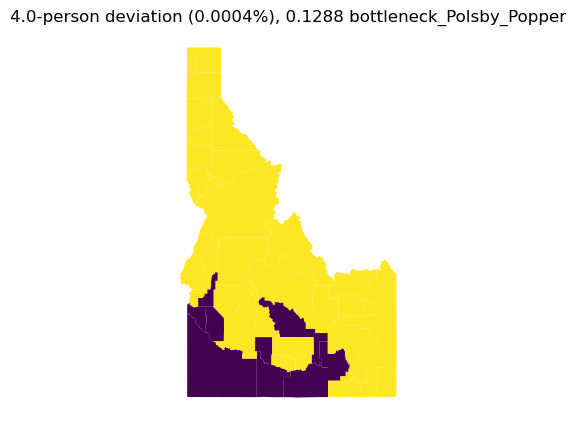

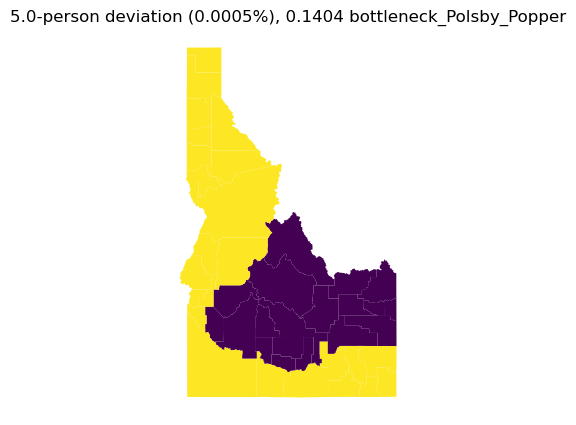

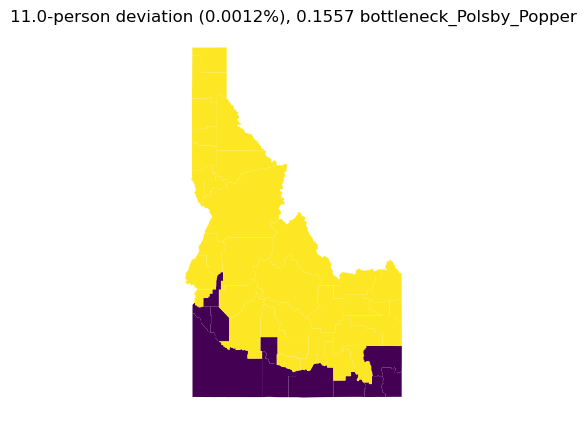

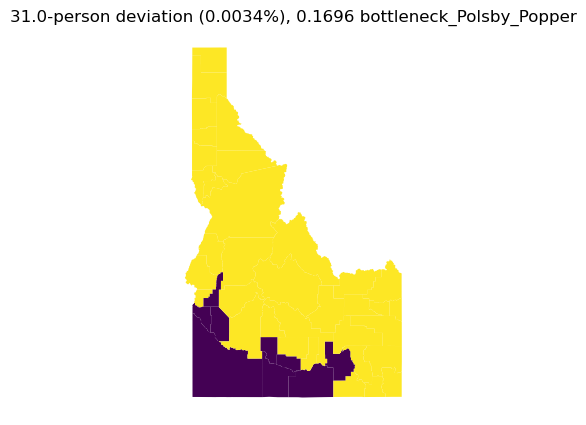

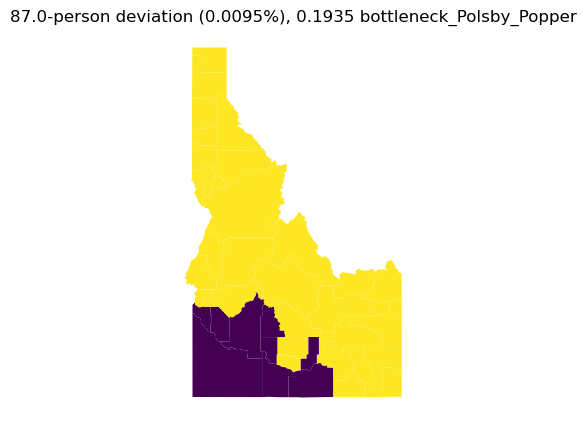

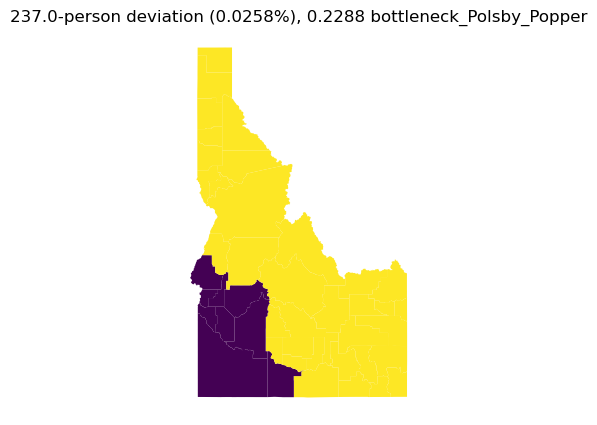

In [7]:
from pareto import plot_pareto_frontiers

obj_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']

pareto_plans = plot_pareto_frontiers(
                G,
                method='heuristic',
                plans=plans,                                   #if method ='epsilon_constraint_method' is None 
                obj_types=obj_types,                           #if method ='epsilon_constraint_method' is obj_type
                ideal_population=ideal_population,
                state=state,
                filepath=filepath,
                filename2=filename2,
                no_solution_region=no_solution_region,
                year=year,
                result=None,                                   #if method ='heuristic' is None 
             )

In [8]:
len(plans)

154

In [9]:
for obj_type in obj_types:
    print("***************************************")
    print("obj_type =", obj_type)
    print("***************************************")
    print("Pareto front plans:", pareto_plans[obj_type])

***************************************
obj_type = cut_edges
***************************************
Pareto front plans: [[[1, 6, 13, 15, 19, 20, 21, 22, 24, 29, 34, 35, 38, 39, 41], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 23, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37, 40, 42, 43]], [[1, 2, 3, 11, 12, 19, 21, 28, 29, 35], [0, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43]], [[0, 1, 5, 8, 15, 19, 20, 22, 26, 27, 28, 29, 30, 32, 34, 35, 38, 41, 43], [2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 21, 23, 24, 25, 31, 33, 36, 37, 39, 40, 42]], [[1, 2, 11, 12, 15, 20, 21, 35, 41], [0, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43]], [[0, 1, 4, 5, 7, 9, 14, 17, 23, 27, 29, 31, 35, 36, 37, 40, 42], [2, 3, 6, 8, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 24, 25, 26, 28, 30, 32, 33, 34, 38, 39, 41, 43]], [[1, 2, 5, 6, 11, 